In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def load_clean_data(path="../Data/processed/dataset_clean.csv"):
    df = pd.read_csv(path)
    return df

df = load_clean_data()



In [5]:
df.head()

,Temperature,Humidity,pH,Rainfall,Label,Category
0,20.879744,82.002744,6.502985,202.935536,Rice,Cereal
1,21.770462,80.319644,7.038096,226.655537,Rice,Cereal
2,23.004459,82.320763,7.840207,263.964248,Rice,Cereal
3,26.491096,80.158363,6.980401,242.864034,Rice,Cereal
4,20.130175,81.604873,7.628473,262.717340,Rice,Cereal


Estadísticas descriptivas generales
Muestra rangos, medias, desviación, min/max.

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,7000.0,23.493807,6.755644,6.105382,18.948438,23.344269,27.686253,46.791488
Humidity,7000.0,71.318934,22.289074,6.029440,58.055782,77.238068,90.259315,99.981876
pH,7000.0,6.454138,0.667650,3.504752,6.049754,6.406537,6.859321,9.935091
Rainfall,7000.0,751.476229,825.472175,20.211267,123.595859,644.904867,1051.049795,5989.995521


In [7]:
df.head()

,Temperature,Humidity,pH,Rainfall,Label,Category
0,20.879744,82.002744,6.502985,202.935536,Rice,Cereal
1,21.770462,80.319644,7.038096,226.655537,Rice,Cereal
2,23.004459,82.320763,7.840207,263.964248,Rice,Cereal
3,26.491096,80.158363,6.980401,242.864034,Rice,Cereal
4,20.130175,81.604873,7.628473,262.717340,Rice,Cereal


In [8]:
df.columns

Index(['Temperature', 'Humidity', 'pH', 'Rainfall', 'Label', 'Category'], dtype='object')

In [9]:
print("Conteo por cultivo (Label):")
print(df['Label'].value_counts(), "\n")

print("Conteo por categoría:")
print(df['Category'].value_counts())


Conteo por cultivo (Label):
Label
Rice            100
Maize           100
Banana          100
Jute            100
Pulses          100
               ... 
Cashewnuts      100
French Beans    100
Sugarcane       100
Bajra           100
Mustard         100
Name: count, Length: 70, dtype: int64 

Conteo por categoría:
Category
Vegetable          2100
Fruit              1300
Commercial Crop    1100
Legume              900
Other               600
Cereal              400
Medicinal           200
Flower              200
Spice               200
Name: count, dtype: int64


Histogramas de las variables numéricas

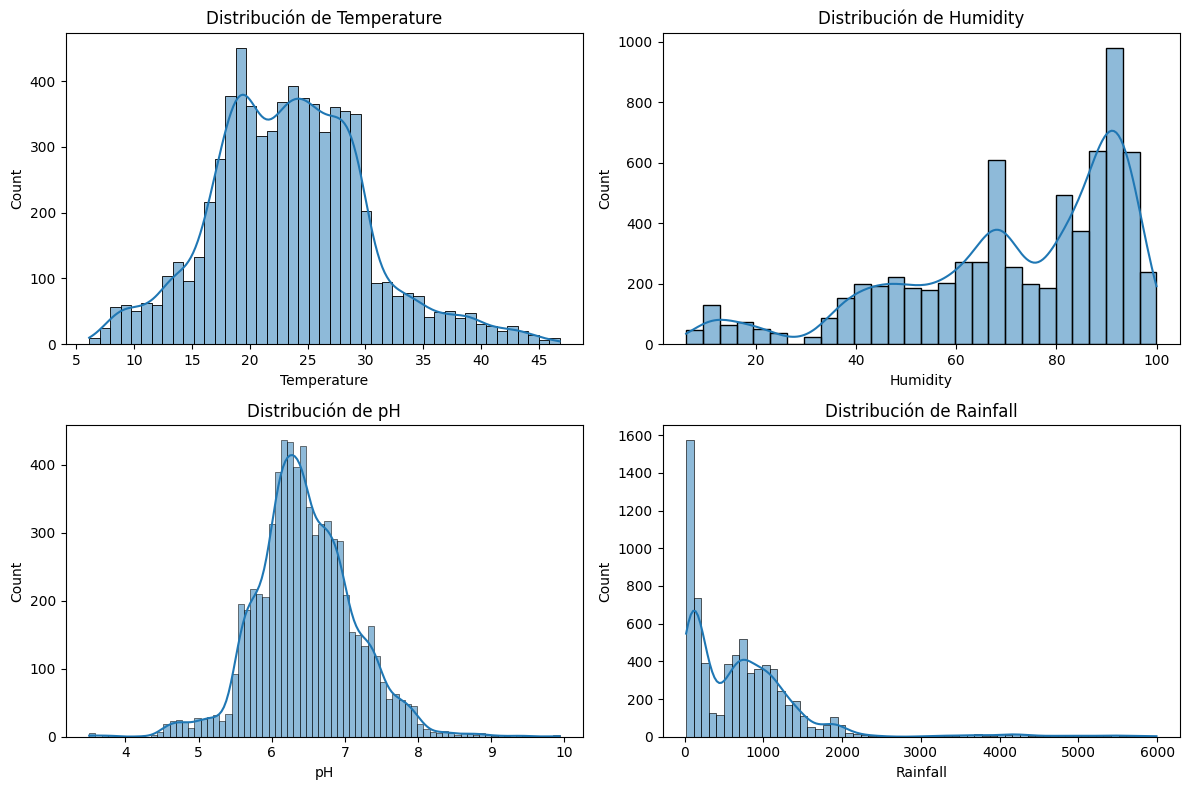

In [10]:

numeric_cols = ["Temperature", "Humidity", "pH", "Rainfall"]

plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribución de {col}")

plt.tight_layout()
plt.show()


1. Distribución de Temperatura

Forma: Aproximadamente normal.

Rango: Entre 5 °C y 45 °C.

Implicación: No parece haber outliers extremos. La normalidad sugiere que podrías usar modelos que asumen distribución normal sin transformaciones.

2. Distribución de Humedad

Forma: Asimétrica, con sesgo leve hacia la izquierda.

Pico: Alrededor de 80 %.

Rango: De 20 % a 100 %.

Implicación: Aunque no es perfectamente normal, la mayoría de los datos están en rangos altos. Podrías considerar transformar si usas modelos sensibles a la simetría.

3. Distribución de pH

Forma: Pico agudo cerca de 6.5, con cola hacia ambos lados.

Rango: De 3 a 9.

Implicación: Posible concentración en suelos ligeramente ácidos. La forma sugiere que esta variable podría tener un impacto fuerte si estás modelando crecimiento vegetal o calidad del suelo.

4. Distribución de Precipitación

Forma: Fuertemente sesgada a la derecha.

Rango: De 0 a 6000 mm, con mayoría debajo de 1000 mm.

Implicación: Hay valores extremos (outliers). Esta variable probablemente necesite transformación (logarítmica, raíz cuadrada) para estabilizar varianza y mejorar interpretabilidad.

Boxplots para ver outliers visualmente

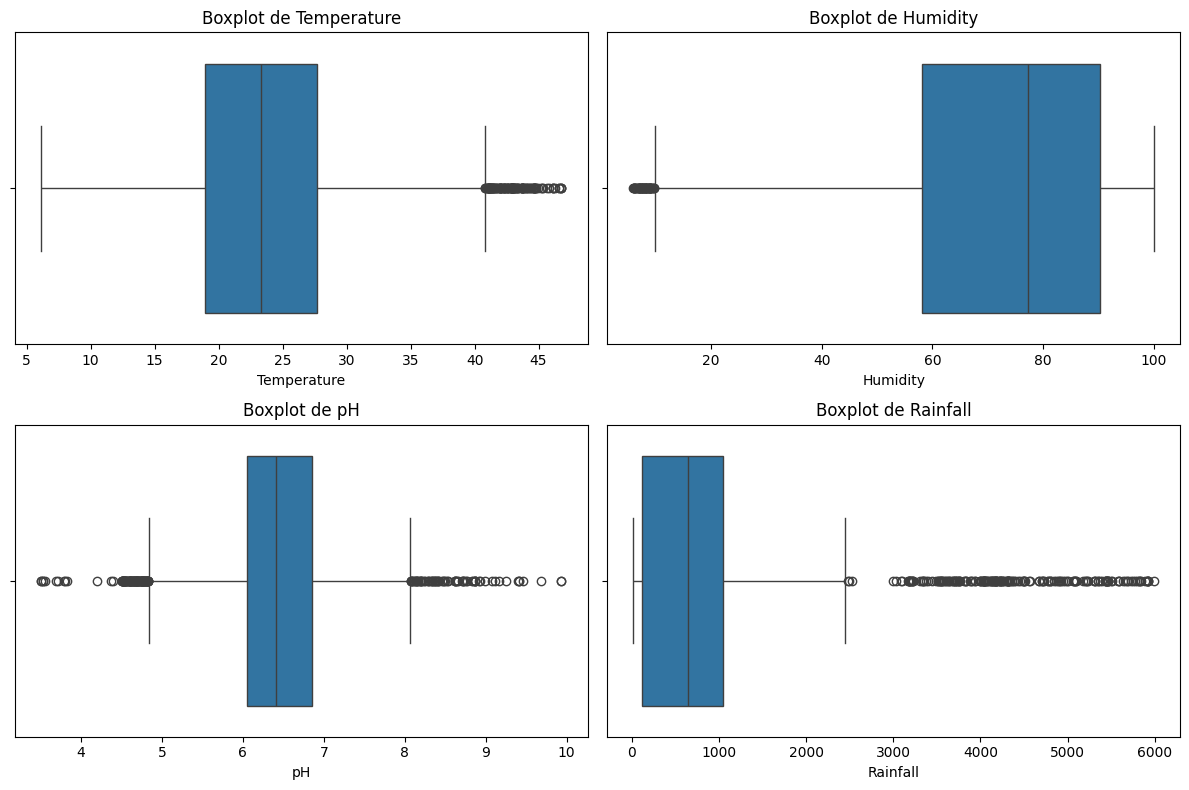

In [11]:
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")

plt.tight_layout()
plt.show()


Mapa de correlación

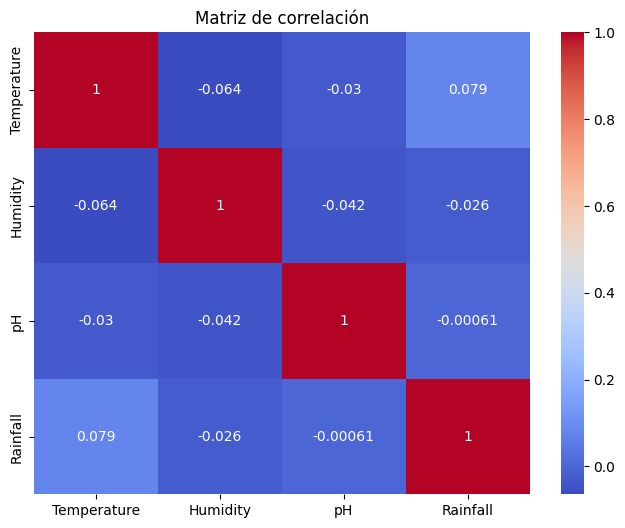

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()


    Análisis por Categorías

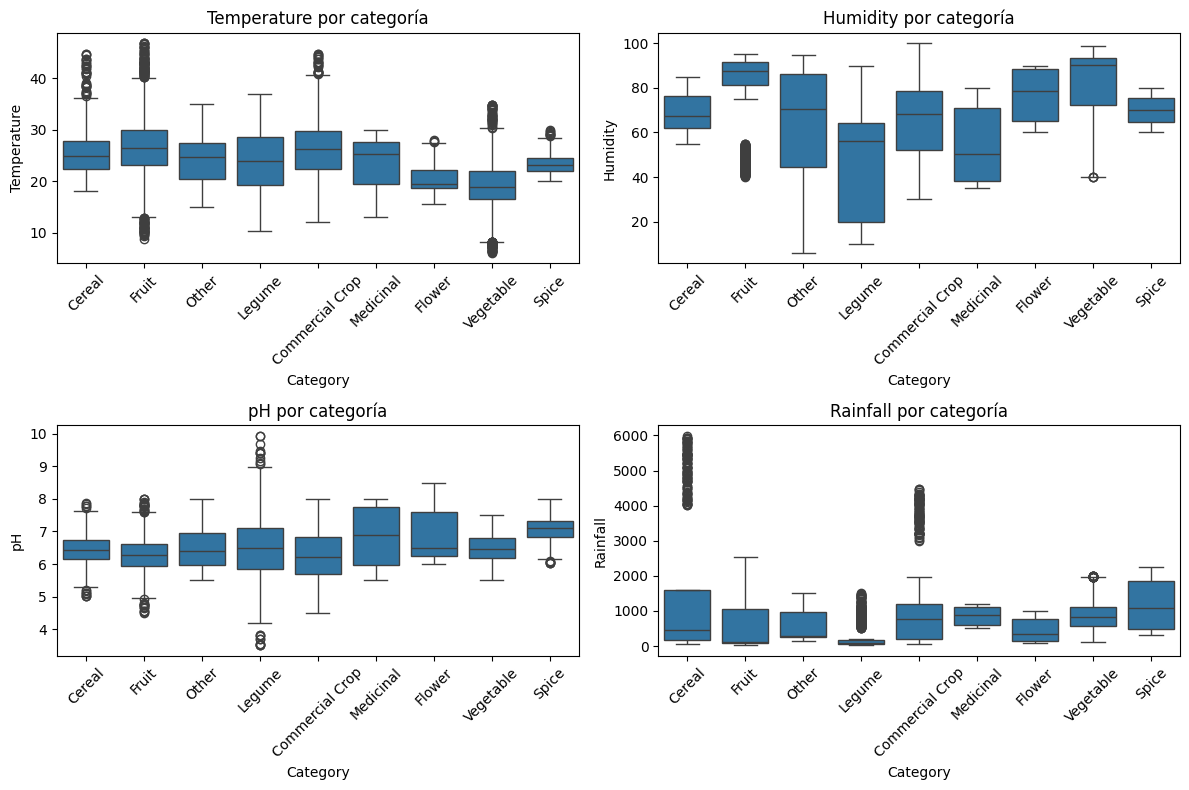

In [13]:
plt.figure(figsize=(12,8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df["Category"], y=df[col])
    plt.xticks(rotation=45)
    plt.title(f"{col} por categoría")
plt.tight_layout()
plt.show()


Análisis para ver patrones por cultivo

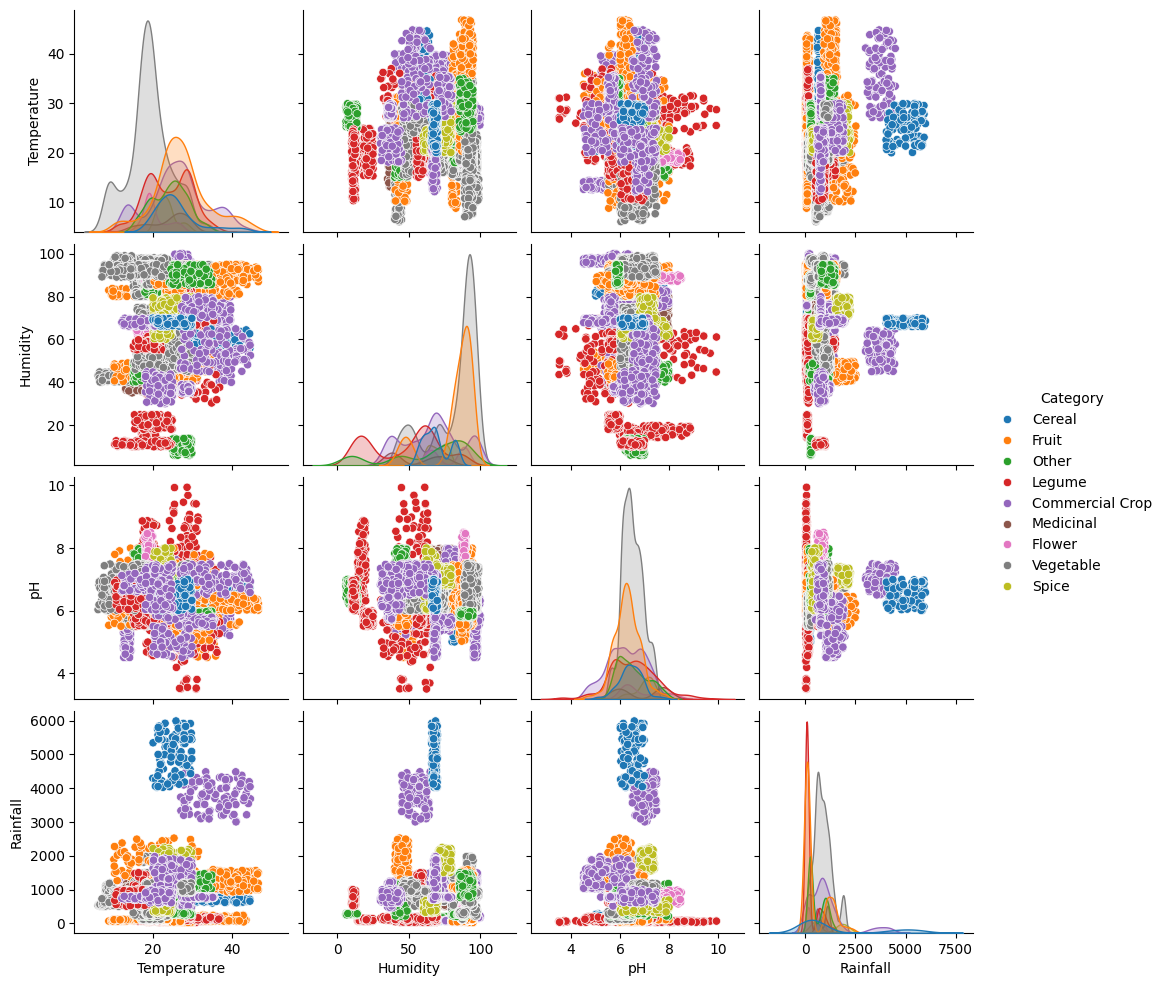

In [14]:
sns.pairplot(df, hue="Category", vars=numeric_cols)
plt.show()


Fase de EDA: Exploración de Variables Ambientales y Tipos de Cultivo

1. Las variables ambientales presentan comportamientos distintos por categoría de cultivo.
2. No hay correlaciones lineales fuertes, lo que indica una relación compleja.
3. Rainfall es la única variable que podría requerir transformación (log).
4. Cada tipo de cultivo tiene un “perfil ambiental ideal” claramente visible.
5. El dataset es adecuado para modelos de clasificación no lineales.